## Lesson-01

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
import pandas as pd

In [4]:
dataframe = pd.DataFrame(data['data'])

In [5]:
dataframe.columns = data['feature_names']

In [6]:
dataframe['price'] = data['target']

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

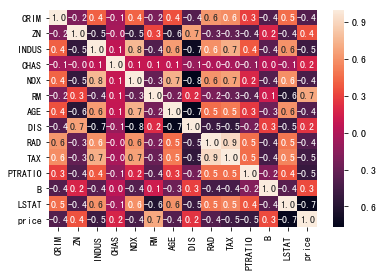

In [9]:
sns.heatmap(dataframe.corr(), annot=True, fmt='.1f')

In [10]:
import matplotlib.pyplot as plt

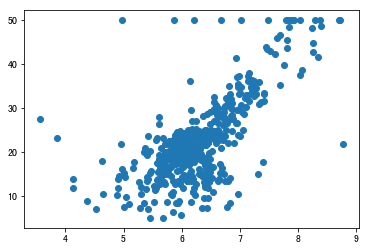

In [11]:
plt.scatter(dataframe['RM'], dataframe['price'])

In [11]:
x = dataframe['RM']

In [12]:
y = dataframe['price']

In [13]:
history_notes = {_x : _y for _x, _y in zip(x, y)}

In [15]:
history_notes[6.57]

KeyError: 6.57

In [14]:
similary_ys = [y for _, y in sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]

In [15]:
import numpy as np

In [16]:
np.mean(similary_ys)

24.2

## 用历史数据来预测未曾见到的过的数据，最直接的方法

## K-Neighbor-Nearst

In [17]:
def knn(query_x, history, top_n=3):
    sorted_notes = sorted(history.items(), key=lambda x_y: (x_y[0] - query_x) ** 2) 
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, y in similar_notes]
    
    return np.mean(similar_ys)

In [18]:
knn(5.4, history_notes)

15.700000000000001

## 为了更快的获得结果，我们希望通过拟合函数来获得预测能力

$$ f(rm) = k * rm + b $$ 

## Random Approach

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

In [19]:
def loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

In [20]:
import random

In [21]:
min_loss = float('inf')
best_k, bes_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i  + b for rm_i in x]
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = -16 * rm + -56, 此时loss是: 32426.19362535967
在第3步，我们获得了函数 f(rm) = -15 * rm + 56, 此时loss是: 4026.735323270751
在第5步，我们获得了函数 f(rm) = 18 * rm + -89, 此时loss是: 85.1384949169961
在第759步，我们获得了函数 f(rm) = 8 * rm + -23, 此时loss是: 66.70708736758893


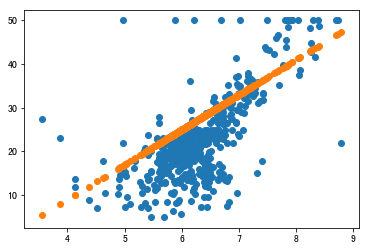

In [22]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## 蒙特卡洛模拟

## Supervisor

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [25]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

k_history, b_history = [], []
loss_history = []
k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, x, y) * learning_rate), b + (-1 * partial_b(k, b, x, y) * learning_rate)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        k_history.append(best_k)
        b_history.append(best_b)
        loss_history.append(current_loss)
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 2.9548682540605573 * rm + 0.742766788971827, 此时loss是: 72.58573622275811
在第1步，我们获得了函数 f(rm) = 3.4201444852135285 * rm + 0.8071622468833421, 此时loss是: 59.56057254743404
在第2步，我们获得了函数 f(rm) = 3.5052050334691183 * rm + 0.811787975598199, 此时loss是: 59.12920474905207
在第3步，我们获得了函数 f(rm) = 3.5216538839548313 * rm + 0.8056297008072772, 此时loss是: 59.1079402457824
在第4步，我们获得了函数 f(rm) = 3.5257212161238893 * rm + 0.7975270912842755, 此时loss是: 59.10003366901504
在第5步，我们获得了函数 f(rm) = 3.5275539897344648 * rm + 0.7890753000394448, 此时loss是: 59.0925655441219
在第6步，我们获得了函数 f(rm) = 3.5289832641262913 * rm + 0.7805621783783657, 此时loss是: 59.085115164326886
在第7步，我们获得了函数 f(rm) = 3.530339461308906 * rm + 0.7720396698106715, 此时loss是: 59.07766882821877
在第8步，我们获得了函数 f(rm) = 3.5316822073126297 * rm + 0.7635171473453335, 此时loss是: 59.07022608796331
在第9步，我们获得了函数 f(rm) = 3.5330222619554728 * rm + 0.7549963019751326, 此时loss是: 59.06278692731128
在第10步，我们获得了函数 f(rm) = 3.534361566952917 * rm + 0.746477438442548

## How to visualize k, b, loss and 3-d surface???

In [51]:
%matplotlib inline

Text(0.5, 0, 'loss')

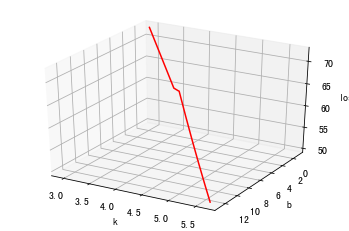

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(k_history, b_history, loss_history, color='red')
ax.set_xlabel('k')
ax.set_ylabel('b')
ax.set_zlabel('loss')

In [246]:
best_k, best_b

(5.656182662843543, -12.750676812837026)

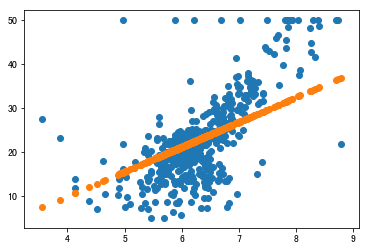

In [247]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Supervised Learning

## 我们把房价的预测 变成更加负责，精细的模型，该怎么做？

$$ f(x) = k * x + b $$

$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

In [252]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

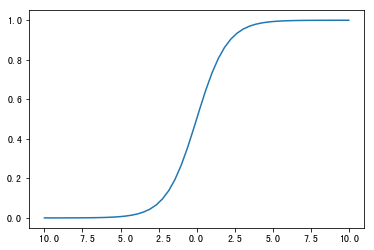

In [253]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [261]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b

In [271]:
def complex_function(x):
    return (random_linear(x))

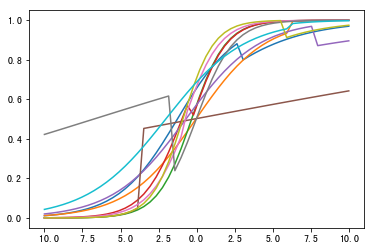

In [276]:
for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)

## 我们可以通过简单的、基本的模块，经过反复的叠加，来实现更加复杂的函数

## 面向越来越越复杂的函数？计算机如何求导？

## 1. 什么是机器学习？
## 2. KNN这种方法的缺陷，提出线性拟合的背景是什么
## 3. 怎么样通过监督的方法，来获得更快的函数权值更新
## 4. 非线性函数和线性函数的结合，可以拟合出非常复杂的函数
## 5. 深度学习我们可以通过基本的函数模块，来拟合更加复杂的函数

## Assigment:

$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$


## 将课堂代码中的L2-Loss 变成L1Loss 并且实现梯度下降